In [32]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [52]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import torch #to load yolo model
import matplotlib.pyplot as plt #used to visualize img
import numpy as np #array
import cv2

# load model directory, type (small)

In [36]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Kaushik/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-2 Python-3.11.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# to see inside=== model

In [ ]:
model

# Make Detections with Images

In [38]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [39]:
results = model(img)
results.pandas().xyxy[0]

xmin        ymin         xmax        ymax  confidence  class    name
0  743.290588   48.343842  1141.756348  720.000000    0.879861      0  person
1  441.989624  437.336670   496.585083  710.036255    0.675119     27     tie
2  123.051056  193.238068   714.690552  719.771240    0.666694      0  person
3  978.989807  313.579468  1025.302856  415.526184    0.261517     27     tie

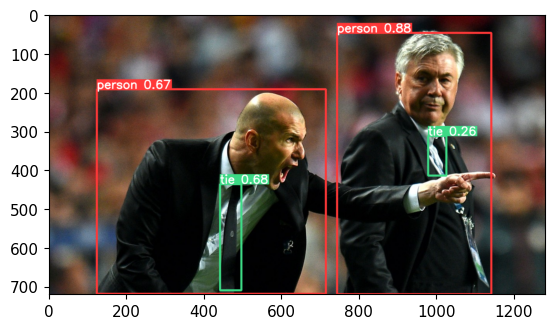

In [40]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [41]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [ ]:
results = model(img)
results.pandas().xyxy[0]

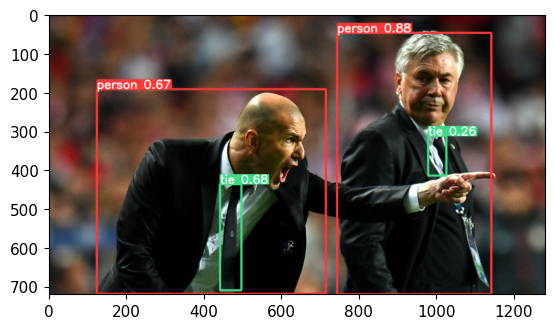

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# Real Time Detections

In [ ]:
cap= cv2.VideoCapture(0) #jst to open the camera #'street.mp4'
while cap.isOpened():
    ret, frame= cap.read()  #return value and the frame image
    results= model(frame)  #yolo model, pass through the frame(webcam)
    
    #jst show name YOLO/top anything #results.render() jst return np array(img)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF== ord('q'):    #exit
        break
cap.release()              #close camera
cv2.destroyAllWindows()    #close the popup

#  Sleep detect Trainning from scratch

In [43]:
import uuid #unique identifier
import os   #to work with file path
import time #for a break btwn img capture
import cv2

In [44]:
IMAGES_PATH= os.path.join('data', 'images') #folder data->img
labels= ['awake', 'sleep']
number_img = 20  #jst fr checking purpose

In [ ]:
cap= cv2.VideoCapture(0)
#loop for labels
for label in labels:
    #collecting img for awake // sleep
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    #loop for imgs
    for img_num in range(number_img):
        print('collecting imgs for {}, img no. {}'.format(label, img_num))
        
        ret, frame= cap.read()  #webcam feed(frame)
        
        #data\images\awake.2342342fdfwsdadweer32q.jpg #naming of imgs(Kaushik)
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        cv2.imwrite(imgname,frame) #write img to file
        
        cv2.imshow('Image collec', frame) #show the img
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

collecting imgs for awake, img no. 0
collecting imgs for awake, img no. 1
collecting imgs for awake, img no. 2
collecting imgs for awake, img no. 3
collecting imgs for awake, img no. 4
collecting imgs for awake, img no. 5
collecting imgs for sleep, img no. 0
collecting imgs for sleep, img no. 1


In [45]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [46]:
# in the website only
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 50 --data dataset.yml --weights yolov5s.pt


In [48]:
#forcereload if we can't find last file #custom coz this type full dataset nt only yolov5
model= torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload= True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Kaushik/.cache\torch\hub\master.zip
YOLOv5  2024-6-2 Python-3.11.0 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [49]:
#checking the img
img= os.path.join('data', 'images', 'awake.2c7dd281-20d6-11ef-a913-38f3ab758a4b.jpg')

In [ ]:
results= model(img)
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap= cv2.VideoCapture(0) #jst to open the camera #'street.mp4'
while cap.isOpened():
    ret, frame= cap.read()  #return value and the frame image
    results= model(frame)  #yolo model, pass through the frame(webcam)
    
    #jst show name YOLO/top anything #results.render() jst return np array(img)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF== ord('q'):    #exit
        break
cap.release()              #close camera
cv2.destroyAllWindows()    #close the popup